In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set2")

In [ ]:
df = pd.read_csv('/content/ss.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df = df.drop('Person ID', axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

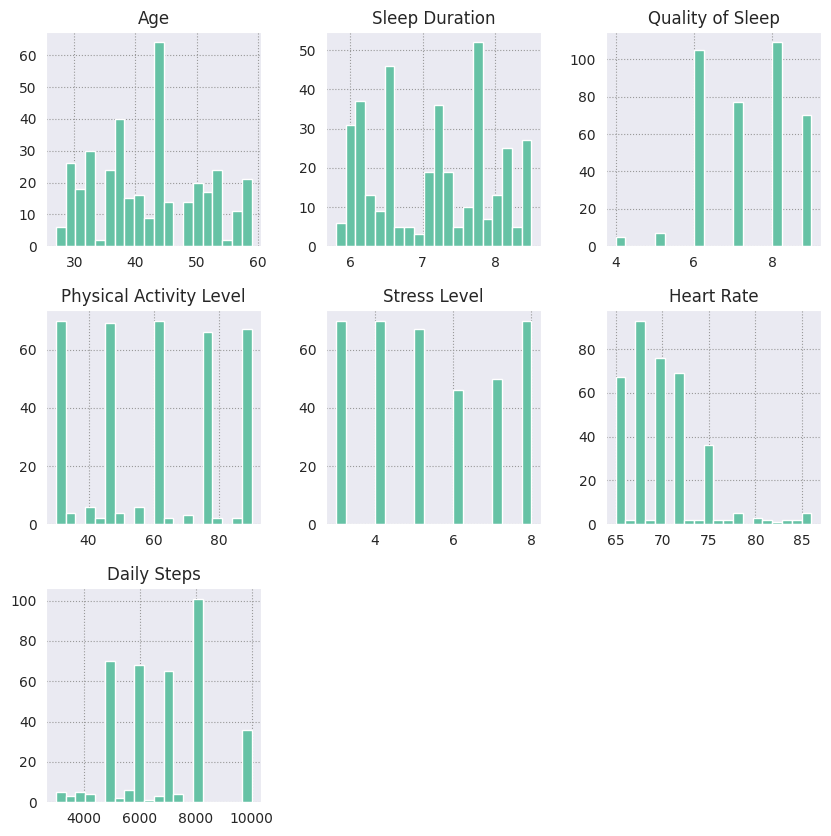

In [ ]:
df.hist(figsize=(10, 10), bins=20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   373 non-null    object 
 1   Age                      373 non-null    int64  
 2   Occupation               373 non-null    object 
 3   Sleep Duration           373 non-null    float64
 4   Quality of Sleep         373 non-null    int64  
 5   Physical Activity Level  373 non-null    int64  
 6   Stress Level             373 non-null    int64  
 7   BMI Category             373 non-null    object 
 8   Blood Pressure           373 non-null    object 
 9   Heart Rate               373 non-null    int64  
 10  Daily Steps              373 non-null    int64  
 11  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.1+ KB


In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,373,373,373,373,154
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,72,195,99,77


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,77
Insomnia,77


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,77
Insomnia,77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   373 non-null    object 
 1   Age                      373 non-null    int64  
 2   Occupation               373 non-null    object 
 3   Sleep Duration           373 non-null    float64
 4   Quality of Sleep         373 non-null    int64  
 5   Physical Activity Level  373 non-null    int64  
 6   Stress Level             373 non-null    int64  
 7   BMI Category             373 non-null    object 
 8   Blood Pressure           373 non-null    object 
 9   Heart Rate               373 non-null    int64  
 10  Daily Steps              373 non-null    int64  
 11  Sleep Disorder           373 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.1+ KB


In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,147
Normal Weight,21
Obese,10


In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,147
Obese,10


In [ ]:
occupation = df['Occupation'].value_counts()
occupation

,count
Occupation,
Nurse,72
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


Text(0.5, 1.0, 'Distribution of Respondents')

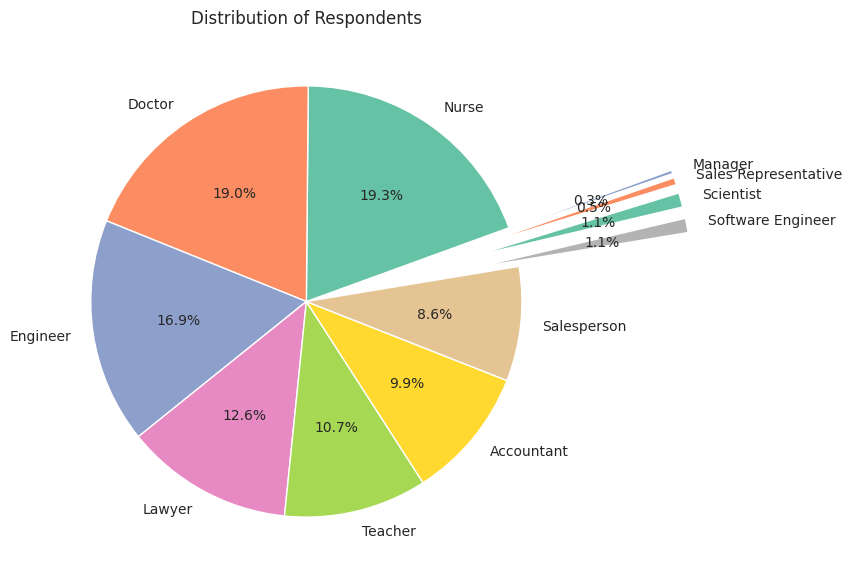

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(occupation, labels=occupation.index, autopct='%1.1f%%', startangle=20, explode=[0, 0, 0, 0, 0, 0, 0, 0.8, 0.8, 0.8, 0.8])
plt.title("Distribution of Respondents")

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,184


In [ ]:
group_sleep_disorder_by_gender = df.groupby('Gender')['Sleep Disorder'].value_counts().sort_index()
group_sleep_disorder_by_gender

Gender  Sleep Disorder
Female  Insomnia           36
        No Disorder        82
        Sleep Apnea        66
Male    Insomnia           41
        No Disorder       137
        Sleep Apnea        11
Name: count, dtype: int64

<Axes: title={'center': 'Dependence between quality of sleep and daily steps'}, xlabel='Daily Steps', ylabel='Quality of Sleep'>

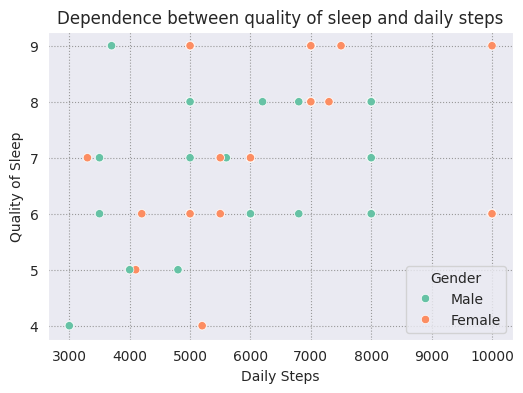

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between quality of sleep and daily steps")
sns.scatterplot(data=df, x='Daily Steps', y='Quality of Sleep', hue='Gender')

<Axes: title={'center': 'Dependence between quality of sleep and age'}, xlabel='Age', ylabel='Quality of Sleep'>

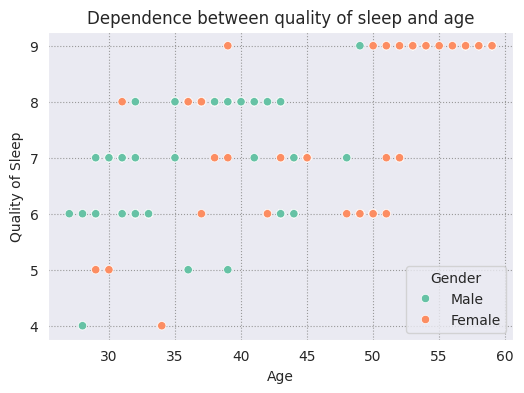

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between quality of sleep and age")
sns.scatterplot(data=df, x='Age', y='Quality of Sleep', hue='Gender')

In [ ]:
df[["High Pressure", "Low Pressure"]]=df["Blood Pressure"].str.split("/",expand=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
df['High Pressure'] = df['High Pressure'].astype('int32')
df['Low Pressure'] = df['Low Pressure'].astype('int32')

In [ ]:
def high_pressure(high_pressure):
  if high_pressure > 139:
    return 'Hypertension'
  elif high_pressure > 90:
    return 'Normal'
  else:
    return 'Hypotension'

In [ ]:
df['Blood Pressure Level'] = df['High Pressure'].apply(high_pressure)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure,Blood Pressure Level
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension


<Axes: title={'center': 'Dependence between BMI and Blood High Pressure'}, xlabel='BMI Category', ylabel='High Pressure'>

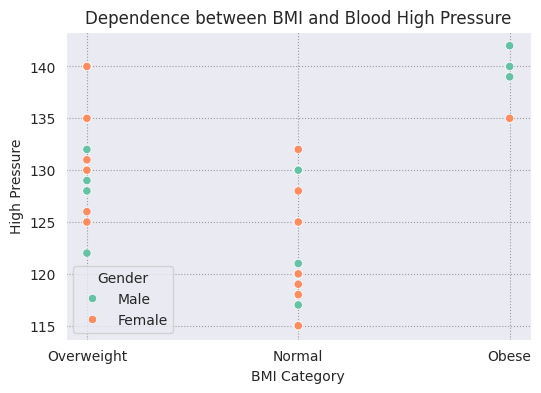

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between BMI and Blood High Pressure")
sns.scatterplot(data=df, x='BMI Category', y='High Pressure', hue='Gender')

Text(0.5, 1.0, 'Distribution of Blood Pressure Level')

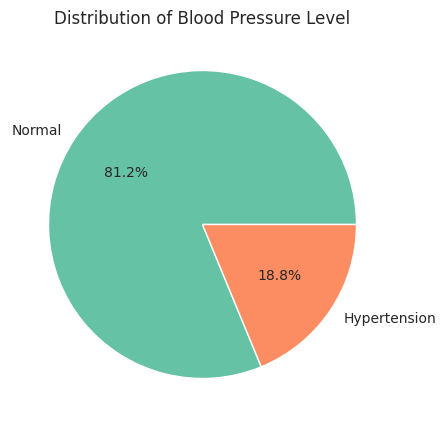

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(df['Blood Pressure Level'].value_counts(),
        labels=df['Blood Pressure Level'].unique(),
        autopct='%1.1f%%')
plt.title("Distribution of Blood Pressure Level")

<Axes: title={'center': 'Dependence between Blood High Pressure and Quality of Sleep'}, xlabel='High Pressure', ylabel='Quality of Sleep'>

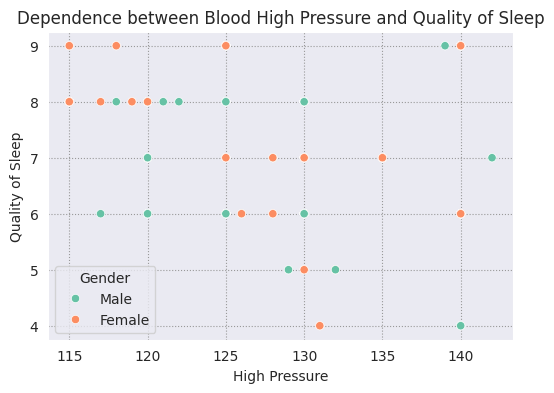

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Blood High Pressure and Quality of Sleep")
sns.scatterplot(data=df, x='High Pressure', y='Quality of Sleep', hue='Gender')

<Axes: title={'center': 'Dependence between Blood High Pressure and Age'}, xlabel='Age', ylabel='High Pressure'>

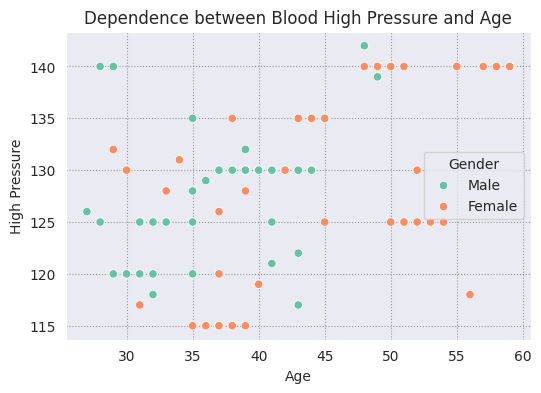

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Blood High Pressure and Age")
sns.scatterplot(data=df, x='Age', y='High Pressure', hue='Gender')

<Axes: title={'center': 'Dependence between Strees Level and Blood High Pressure'}, xlabel='Stress Level', ylabel='High Pressure'>

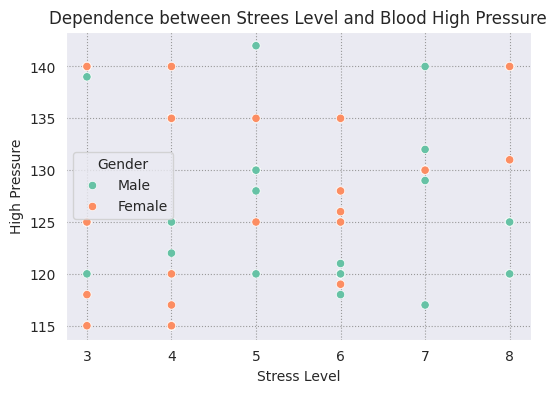

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Strees Level and Blood High Pressure")
sns.scatterplot(data=df, x='Stress Level', y='High Pressure', hue='Gender')

Text(0.5, 1.0, 'Average Sleep Duration in Occupations')

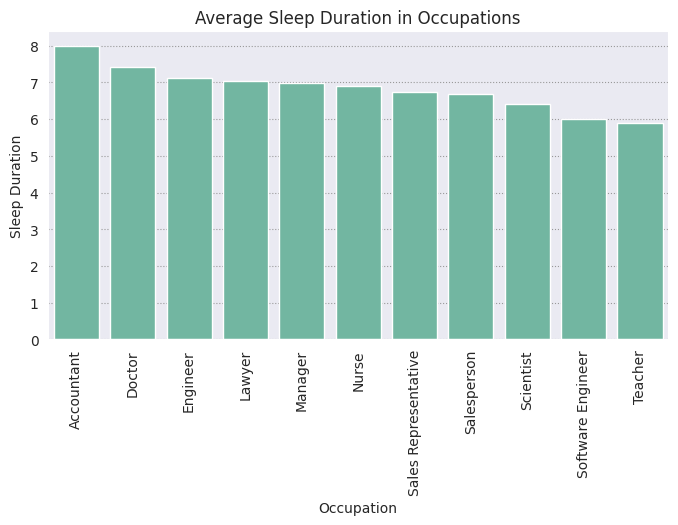

In [ ]:
# Calculate average sleep duration for each occupation
occupation_sleep_group = df.groupby('Occupation')['Sleep Duration'].mean()

plt.figure(figsize=(8, 4))
# Now use the defined variable to plot
sns.barplot(x=occupation_sleep_group.index, y=occupation_sleep_group.sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.title("Average Sleep Duration in Occupations")

In [ ]:
occupation_quality_sleep_group = df.groupby('Occupation')['Quality of Sleep'].mean()
occupation_quality_sleep_group

,Quality of Sleep
Occupation,
Accountant,7.891892
Doctor,6.647887
Engineer,8.412698
Lawyer,7.893617
Manager,7.000000
Nurse,7.347222
Sales Representative,4.000000
Salesperson,6.000000
Scientist,5.000000


Text(0.5, 1.0, 'Average Sleep Quality in Occupations')

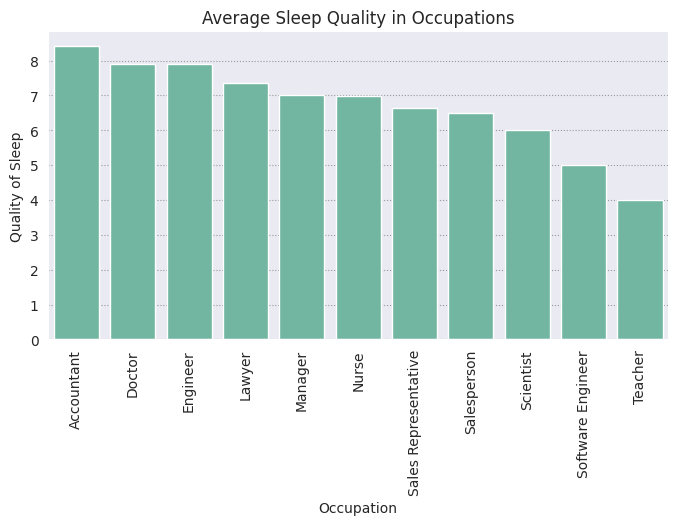

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=occupation_quality_sleep_group.index, y=occupation_quality_sleep_group.sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.title("Average Sleep Quality in Occupations")